# Import all the necessary libraries

In [1]:
import inspect
import matplotlib.pyplot as plt
import networkx as nx
import np as np
import map_to_graph as m2g
from plot_generation import plot_generation_ratio, get_mean_proba

# Define the position of the cities

In [10]:
pos_dict = {"mons" : [50.453, 3.95, 900],
"new_york" : [40.7443, -73.9903, 4000],
"washington" : [38.9064, -77.0295, 3000],
"charleroi" : [50.4116, 4.4448, 900],
"dallas" : [32.9096, -96.9506, 3000],
"miami" : [26.9, 25.3912, -80.0252, -80.517],
"barcelona" : [41.3899, 2.1701, 2000]}

# Create the graph from the position of the cities

In [11]:
graph_dict = {}

for key in pos_dict :
    if len(pos_dict[key]) == 3 :
        graph_dict[key] = m2g.map_to_graph_from_point(pos_dict[key], key=key).to_undirected()
    elif len(pos_dict[key]) == 4 :
        graph_dict[key] = m2g.map_to_graph_from_bbox(pos_dict[key], key=key).to_undirected()

/Users/noafoucoux/Documents/Cours/ma1/projet M1/map_to_graph/venv/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


# the graph of ratio of degree distribution for each city

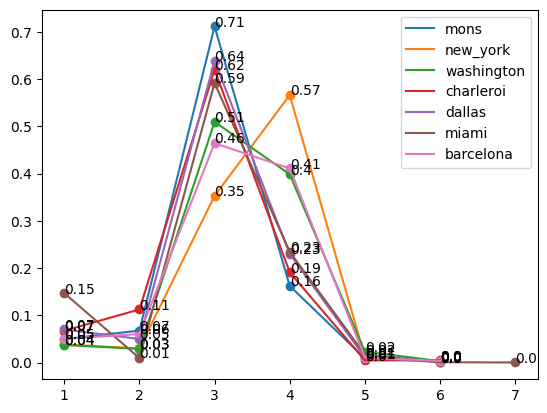

In [12]:
degree = []

degree.append(m2g.get_degree_sequence(graph_dict["mons"]))
degree.append(m2g.get_degree_sequence(graph_dict["new_york"]))
degree.append(m2g.get_degree_sequence(graph_dict["washington"]))
degree.append(m2g.get_degree_sequence(graph_dict["charleroi"]))
degree.append(m2g.get_degree_sequence(graph_dict["dallas"]))
degree.append(m2g.get_degree_sequence(graph_dict["miami"]))
degree.append(m2g.get_degree_sequence(graph_dict["barcelona"]))

plot_generation_ratio(degree, list(graph_dict.keys()))



In [9]:
for city in degree :
    print (len(city))

444
4026
2780
445
1487
158724


# same but for degree >3

34.3793401927484* e^(-1.2743522467865194x)


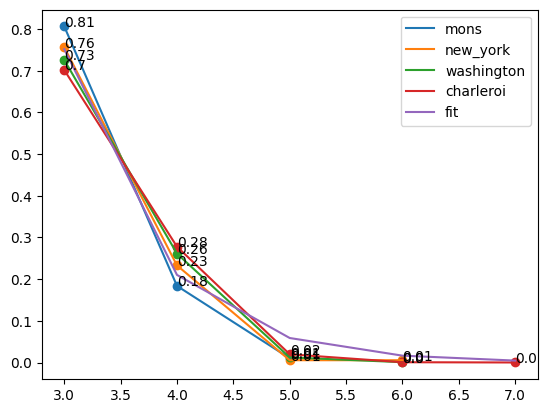

(34.3793401927484, 1.2743522467865194)


In [16]:
degree = []
degree.append([e for e in m2g.get_degree_sequence(graph_dict["mons"]) if e != 0 and e != 1 and e != 2])
#degree.append([e for e in m2g.get_degree_sequence(graph_dict["new_york"]) if e != 0 and e != 1 and e != 2])
#degree.append([e for e in m2g.get_degree_sequence(graph_dict["washington"]) if e != 0 and e != 1 and e != 2])
degree.append([e for e in m2g.get_degree_sequence(graph_dict["charleroi"]) if e != 0 and e != 1 and e != 2])
degree.append([e for e in m2g.get_degree_sequence(graph_dict["dallas"]) if e != 0 and e != 1 and e != 2])
degree.append([e for e in m2g.get_degree_sequence(graph_dict["miami"]) if e != 0 and e != 1 and e != 2])
#degree.append([e for e in m2g.get_degree_sequence(graph_dict["barcelona"])if e != 0 and e != 1 and e != 2])

a = plot_generation_ratio(degree, list(graph_dict.keys()), fit=True)

print (a)

# number of nodes > 3

In [11]:
for city in degree :
    print (len(city))

392
3752
2597
365
1309
133925


# create the graph with a distance of 900m for each city

In [13]:
graph_dict_dist_eq = {}

for key in pos_dict :
    if len(pos_dict[key]) == 3 :
        graph_dict_dist_eq[key] = m2g.map_to_graph_from_point(pos_dict[key], key=key, dist=900)
    elif len(pos_dict[key]) == 4 :
        pass

graph_dict_dist_eq

{'mons': <networkx.classes.multidigraph.MultiDiGraph at 0x300412820>,
 'new_york': <networkx.classes.multidigraph.MultiDiGraph at 0x30eb37e50>,
 'washington': <networkx.classes.multidigraph.MultiDiGraph at 0x2fba1b100>,
 'charleroi': <networkx.classes.multidigraph.MultiDiGraph at 0x30eb00160>,
 'dallas': <networkx.classes.multidigraph.MultiDiGraph at 0x2fe523a00>}

# Diameter of the graph for each city

In [15]:
diameter_eq = []
diameter = []

diameter_eq.append(m2g.get_diameter(graph_dict_dist_eq["mons"]))
diameter_eq.append(m2g.get_diameter(graph_dict_dist_eq["new_york"]))
diameter_eq.append(m2g.get_diameter(graph_dict_dist_eq["washington"]))
diameter_eq.append(m2g.get_diameter(graph_dict_dist_eq["charleroi"]))
diameter_eq.append(m2g.get_diameter(graph_dict_dist_eq["dallas"]))

diameter.append(m2g.get_diameter(graph_dict["mons"]))
diameter.append(m2g.get_diameter(graph_dict["new_york"]))
diameter.append(m2g.get_diameter(graph_dict["washington"]))
diameter.append(m2g.get_diameter(graph_dict["charleroi"]))
diameter.append(m2g.get_diameter(graph_dict["dallas"]))

35
32
29
29
26
35
82
66
29
54


# Plot the diameter

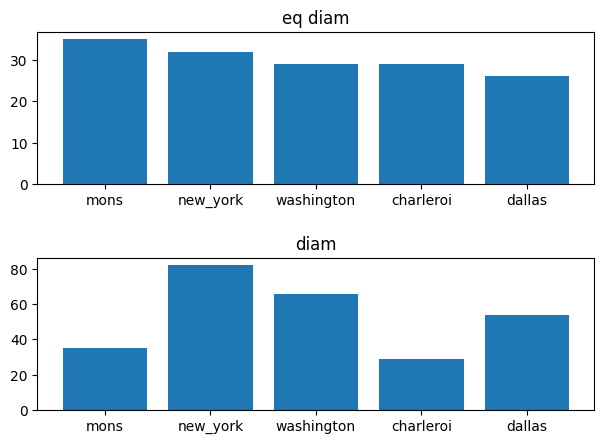

In [17]:
plt.subplot (2, 1, 1)
plt.title("eq diam")
plt.bar(list(pos_dict.keys())[:5], diameter_eq)
plt.subplot (2, 1, 2)
plt.title("diam")
plt.bar(list(pos_dict.keys())[:5], diameter)
plt.tight_layout(pad=2.0)

# Radius of the graph for each city

In [18]:
radius = []
radius_eq = []

radius.append(m2g.get_radius(graph_dict["mons"]))
radius.append(m2g.get_radius(graph_dict["new_york"]))
radius.append(m2g.get_radius(graph_dict["washington"]))
radius.append(m2g.get_radius(graph_dict["charleroi"]))
radius.append(m2g.get_radius(graph_dict["dallas"]))

radius_eq.append(m2g.get_radius(graph_dict_dist_eq["mons"]))
radius_eq.append(m2g.get_radius(graph_dict_dist_eq["new_york"]))
radius_eq.append(m2g.get_radius(graph_dict_dist_eq["washington"]))
radius_eq.append(m2g.get_radius(graph_dict_dist_eq["charleroi"]))
radius_eq.append(m2g.get_radius(graph_dict_dist_eq["dallas"]))

18
41
37
18
28
18
16
15
18
14


# Plot the radius

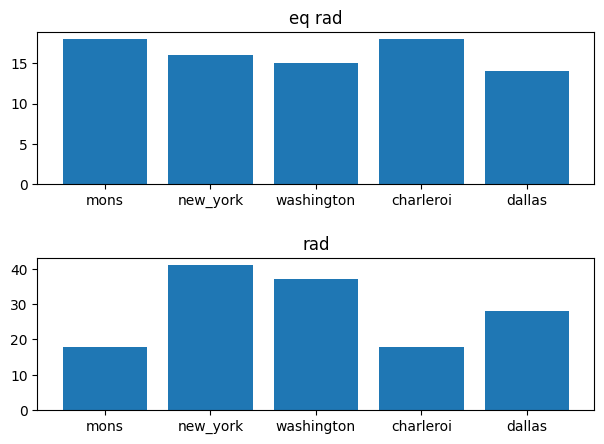

In [19]:
plt.subplot (2, 1, 1)
plt.title("eq rad")
plt.bar(list(pos_dict.keys())[:5], radius_eq)
plt.subplot (2, 1, 2)
plt.title("rad")
plt.bar(list(pos_dict.keys())[:5], radius)
plt.tight_layout(pad=2.0)

# Average shortest path length

In [20]:
avg_shortest_path_length = []
avg_shortest_path_length_eq_dist = []

avg_shortest_path_length.append(m2g.get_average_shortest_path_length(graph_dict["mons"]))
avg_shortest_path_length.append(m2g.get_average_shortest_path_length(graph_dict["new_york"]))
avg_shortest_path_length.append(m2g.get_average_shortest_path_length(graph_dict["washington"]))
avg_shortest_path_length.append(m2g.get_average_shortest_path_length(graph_dict["charleroi"]))
avg_shortest_path_length.append(m2g.get_average_shortest_path_length(graph_dict["dallas"]))

avg_shortest_path_length_eq_dist.append(m2g.get_average_shortest_path_length(graph_dict_dist_eq["mons"]))
avg_shortest_path_length_eq_dist.append(m2g.get_average_shortest_path_length(graph_dict_dist_eq["new_york"]))
avg_shortest_path_length_eq_dist.append(m2g.get_average_shortest_path_length(graph_dict_dist_eq["washington"]))
avg_shortest_path_length_eq_dist.append(m2g.get_average_shortest_path_length(graph_dict_dist_eq["charleroi"]))
avg_shortest_path_length_eq_dist.append(m2g.get_average_shortest_path_length(graph_dict_dist_eq["dallas"]))


12.292223374616151
32.16739454415862
25.76031490029279
12.741431318959409
21.238538396022594
12.292223374616151
10.419971881012284
10.884951427555977
12.741431318959409
11.128422251756218


# Plot the average shortest path length

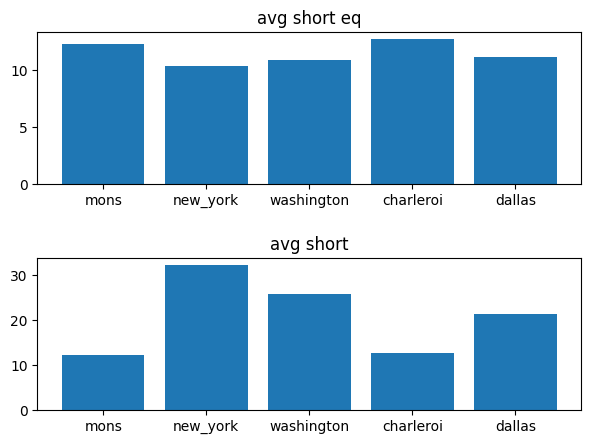

In [21]:
plt.subplot (2, 1, 1)
plt.title("avg short eq")
plt.bar(list(pos_dict.keys())[:5], avg_shortest_path_length_eq_dist)
plt.subplot (2, 1, 2)
plt.title("avg short")
plt.bar(list(pos_dict.keys())[:5], avg_shortest_path_length)
plt.tight_layout(pad=2.0)

# Average degree of the graph for each city

In [22]:
avg_degree = []
avg_degree_eq = []

avg_degree.append(m2g.get_average_degree(graph_dict["mons"]))
avg_degree.append(m2g.get_average_degree(graph_dict["new_york"]))
avg_degree.append(m2g.get_average_degree(graph_dict["washington"]))
avg_degree.append(m2g.get_average_degree(graph_dict["charleroi"]))
avg_degree.append(m2g.get_average_degree(graph_dict["dallas"]))
avg_degree.append(m2g.get_average_degree(graph_dict["miami"]))

avg_degree_eq.append(m2g.get_average_degree(graph_dict_dist_eq["mons"]))
avg_degree_eq.append(m2g.get_average_degree(graph_dict_dist_eq["new_york"]))
avg_degree_eq.append(m2g.get_average_degree(graph_dict_dist_eq["washington"]))
avg_degree_eq.append(m2g.get_average_degree(graph_dict_dist_eq["charleroi"]))
avg_degree_eq.append(m2g.get_average_degree(graph_dict_dist_eq["dallas"]))

{3: 3.142405063291139, 4: 3.2881944444444446, 2: 2.95, 5: 3.3, 1: 3.1363636363636362}
{3: 3.4144968332160452, 4: 3.7697368421052633, 2: 3.154166666666667, 5: 3.4844444444444442, 1: 3.4415584415584415, 6: 3.4444444444444446}
{3: 3.373794401317337, 5: 3.45625, 4: 3.655234657039711, 2: 3.0375, 1: 3.3980582524271843, 6: 3.5625}
{2: 2.83, 3: 3.0893719806763285, 4: 3.3264705882352943, 1: 3.466666666666667, 5: 3.2, 6: 2.5833333333333335}
{3: 3.155087719298246, 1: 3.0673076923076925, 2: 2.831081081081081, 4: 3.3932748538011697, 5: 2.75, 6: 2.8333333333333335}
{3: 3.0830371269040575, 4: 3.4225219657683317, 1: 3.2531216477150826, 5: 2.414750378214826, 2: 2.8443775100401605, 6: 2.698501872659176, 7: 2.9523809523809526}
{3: 3.142405063291139, 4: 3.2881944444444446, 2: 2.95, 5: 3.3, 1: 3.1363636363636362}
{4: 3.766304347826087, 3: 3.2863849765258215, 2: 3.2857142857142856, 1: 3.3333333333333335}
{4: 3.656050955414013, 3: 3.42911877394636, 2: 3.2916666666666665, 1: 3.3125, 5: 3.575, 6: 2.83333333333

# Plot the average degree

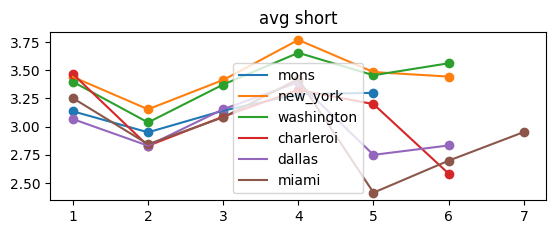

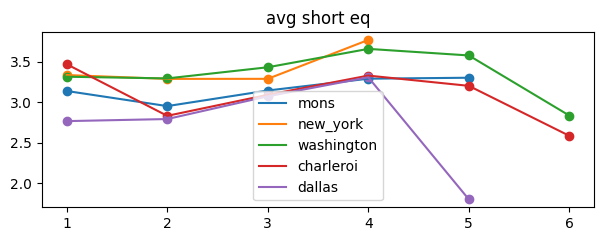

In [25]:
plt.subplot (2, 1, 1)
plt.title("avg short")

for index, element in enumerate(avg_degree):
    temp = []
    for val in range(max(element.keys()) + 1): temp.append(element.get(val))
    nbr_lst = list(range(len(temp)))
    plt.scatter(nbr_lst, temp)
    plt.plot(nbr_lst, temp, label=list(pos_dict.keys())[index])

plt.legend()
plt.show()


plt.subplot (2, 1, 2)

plt.title("avg short eq")
for index, element in enumerate(avg_degree_eq):
    temp = []
    for val in range(max(element.keys()) + 1): temp.append(element.get(val))
    nbr_lst = list(range(len(temp)))
    plt.scatter(nbr_lst, temp)
    plt.plot(nbr_lst, temp, label=list(pos_dict.keys())[index])

plt.tight_layout(pad=2.0)
plt.legend()
plt.show()

# Irregularity

In [26]:
irregularity = []

irregularity.append(m2g.get_irregularity(graph_dict["mons"]))
irregularity.append(m2g.get_irregularity(graph_dict["new_york"]))
irregularity.append(m2g.get_irregularity(graph_dict["washington"]))
irregularity.append(m2g.get_irregularity(graph_dict["charleroi"]))
irregularity.append(m2g.get_irregularity(graph_dict["dallas"]))
irregularity.append(m2g.get_irregularity(graph_dict["miami"]))

irregularity_eq = []

irregularity_eq.append(m2g.get_irregularity(graph_dict_dist_eq["mons"]))
irregularity_eq.append(m2g.get_irregularity(graph_dict_dist_eq["new_york"]))
irregularity_eq.append(m2g.get_irregularity(graph_dict_dist_eq["washington"]))
irregularity_eq.append(m2g.get_irregularity(graph_dict_dist_eq["charleroi"]))
irregularity_eq.append(m2g.get_irregularity(graph_dict_dist_eq["dallas"]))

2.169754023686608
2.1172559638732644
2.2580061517129337
2.193963823247846
2.162247543224071
2.1332348417676488
2.169754023686608
2.1972047980631673
2.304745493107105
2.193963823247846
2.3273856578204404


# Plot the irregularity

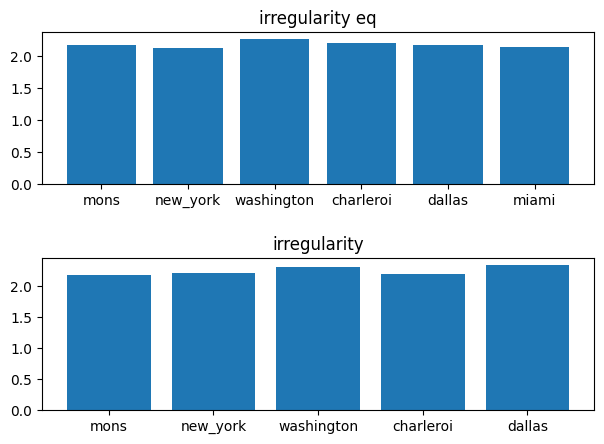

In [27]:
plt.subplot (2, 1, 1)
plt.title("irregularity eq")
plt.bar(list(pos_dict.keys())[:], irregularity)
plt.subplot (2, 1, 2)
plt.title("irregularity")
plt.bar(list(pos_dict.keys())[:5], irregularity_eq)
plt.tight_layout(pad=2.0)

# node by km

In [29]:
value = []
for element in graph_dict.values():
    print (len(list (element.nodes)))
    print (m2g.get_surface(element))
    value.append(len(list (element.nodes)) / m2g.get_surface(element))
    print ("node by km = " + str(len(list (element.nodes)) / m2g.get_surface(element)))

value_eq = []
for element in graph_dict_dist_eq.values():
    print (len(list (element.nodes)))
    print (m2g.get_surface(element))
    value_eq.append(len(list (element.nodes)) / m2g.get_surface(element))


444
5.030798210151161
node by km = 88.25637233950178
4026
83.89011331770591
node by km = 47.99135250602015
2780
45.878651166647394
node by km = 60.59463234658016
445
5.012551397522843
node by km = 88.77714455355309
1487
42.510801847273285
node by km = 34.97934490490865
158724
574.2704894575083
node by km = 276.3924020367833
444
5.030798210151161
233
4.17608186001514
368
3.9450253203746954
445
5.012551397522843
230
3.75704302999727


# Plot the node by km

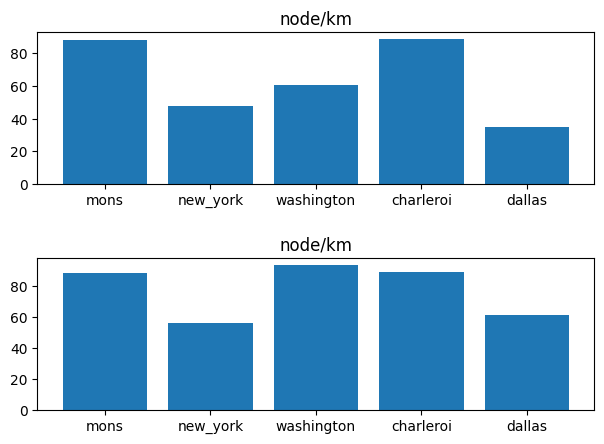

In [30]:
plt.subplot (2, 1, 1)
plt.title("node/km")
plt.bar(list(pos_dict.keys())[:5], value[:5])
plt.subplot (2, 1, 2)
plt.title("node/km")
plt.bar(list(pos_dict.keys())[:5], value_eq)
plt.tight_layout(pad=2.0)


# Edges geometry calculus

In [31]:
geometry_edges = []
for graph in graph_dict.values() :

    edges = list(graph.edges(data=True))
    temp = []

    for e in edges :

        dict_e = e[2]

        if "geometry" in dict_e.keys() :
            temp.append(dict_e["geometry"])
        else :
            temp.append(None)

    geometry_edges.append(temp)

# Edges length calculus

In [32]:
import numpy as np

len_edge =[]
for city in geometry_edges :
    temp = []
    for edge in city :

        if edge != None :
            temp.append(len(edge.xy[0]))
            print (len(edge.xy[0]))

    len_edge.append(temp)

tot = []
for city in len_edge :
    print (np.mean(city))
    tot.append(np.mean(city))

mean_nbr = np.mean(tot)


5
3
9
7
10
4
4
3
9
5
11
19
17
5
3
3
5
3
4
6
9
5
4
3
3
5
6
4
11
11
3
3
3
5
9
5
3
9
9
9
4
7
11
3
5
10
6
5
4
9
7
8
4
4
4
21
5
10
3
9
4
7
4
13
8
10
8
3
5
3
4
7
3
6
3
6
3
7
5
3
5
4
5
7
9
4
3
6
3
7
3
3
3
3
7
9
3
3
10
4
3
5
3
6
3
5
15
13
4
3
4
10
12
3
7
4
9
4
13
5
3
6
14
11
7
3
5
10
7
11
8
8
3
4
5
11
4
6
4
8
8
9
5
5
3
5
3
3
3
10
4
11
7
7
5
3
3
4
6
3
5
5
9
7
5
11
5
4
5
4
9
7
4
4
8
3
4
8
3
5
4
7
10
7
5
4
3
9
6
4
3
9
3
3
8
3
4
6
5
3
6
12
12
4
5
4
6
7
4
16
6
7
6
7
14
9
3
3
4
4
5
18
5
4
3
4
11
7
3
5
10
6
3
3
10
4
5
3
7
15
5
3
4
4
9
3
5
6
3
19
3
3
3
4
5
5
3
18
4
11
3
3
6
8
6
3
8
3
3
5
11
5
5
3
11
4
4
3
5
5
3
9
3
13
4
3
7
4
9
9
10
7
6
3
6
11
3
3
4
10
10
6
5
3
3
4
6
7
7
3
3
10
5
3
4
3
4
9
3
5
11
3
11
4
10
8
5
7
4
8
17
7
4
3
3
3
8
3
7
6
3
8
3
6
3
10
4
9
5
4
3
3
11
8
3
3
9
4
8
3
5
5
26
4
3
3
9
5
4
8
9
6
3
3
6
10
4
8
4
7
4
4
3
5
3
3
3
3
6
5
6
4
12
5
7
7
9
7
5
3
4
6
4
4
3
3
4
4
3
6
4
3
27
4
9
4
4
4
10
30
3
14
4
4
3
3
3
3
5
5
3
10
10
3
7
8
7
4
7
3
3
8
8
3
3
7
15
6
4
9
4
7
10
3
4
3
5
6
3
5
9
16
4
4
5
14
5


# Edges angle calculus

In [33]:
edges_angle = []
for city in geometry_edges :
    temp = []
    for edge in city :

        if edge != None :

            for i in range (len(edge.xy[0])-2) :

                temp.append(np.degrees(m2g.find_angle(edge.xy[0][i], edge.xy[1][i], edge.xy[0][i+1], edge.xy[1][i+1], edge.xy[0][i+2], edge.xy[1][i+2])))

    edges_angle.append(temp)

# delete plane angle

In [34]:
tot = 0
not_plane = 0
for city in edges_angle :
    for angle in city :
        tot +=1
        if angle < 178 :
            not_plane +=1

# ratio of plane angle/total angle

In [37]:
ratio = not_plane/tot

In [38]:
ratio

0.5971427279573296

In [39]:
moy = mean_nbr * ratio

# mean of len of edges

In [23]:
mean_nbr * ratio

3.722626812343183

# pourcentage of node of degree 2

In [18]:
moy/(moy+2)

0.6505101475975713

signifie que entre 2 noeuds de degrée > 2, il y a 3.72 noeuds de degré 2

# Plot degree of angle of edges

{'whiskers': [<matplotlib.lines.Line2D at 0x319877a90>,
 'caps': [<matplotlib.lines.Line2D at 0x30eb00490>,
 'boxes': [<matplotlib.lines.Line2D at 0x319877f10>,
 'medians': [<matplotlib.lines.Line2D at 0x30eb001f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x30eb00340>,
 'means': []}

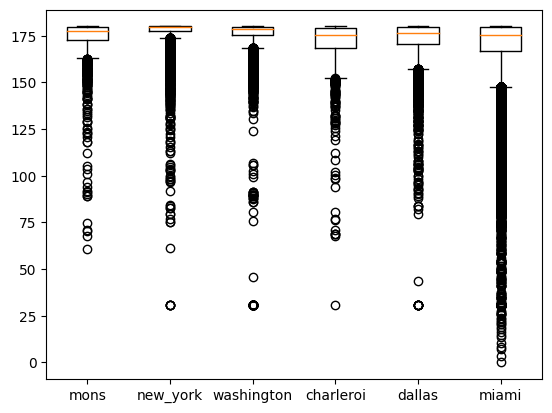

In [40]:
plt.boxplot(edges_angle, labels = list(pos_dict.keys()))

# Analyse entre graph créé et graph analysé

In [6]:
import Generation.graph_generation as gg

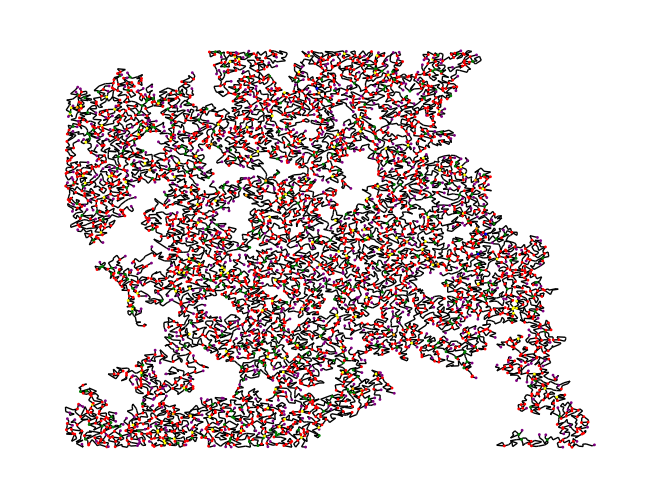

In [7]:
graph_dict["create"] = gg.graph_generation()

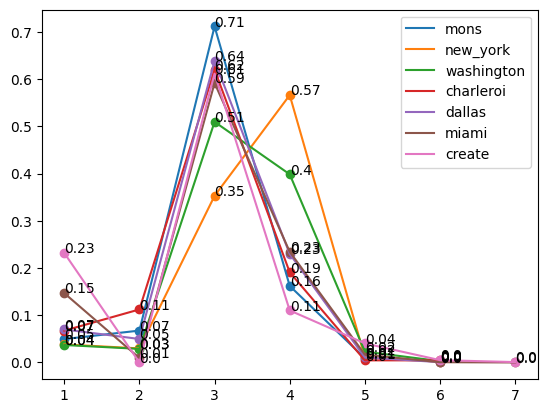

In [9]:
degree = []

degree.append(m2g.get_degree_sequence(graph_dict["mons"]))
degree.append(m2g.get_degree_sequence(graph_dict["new_york"]))
degree.append(m2g.get_degree_sequence(graph_dict["washington"]))
degree.append(m2g.get_degree_sequence(graph_dict["charleroi"]))
degree.append(m2g.get_degree_sequence(graph_dict["dallas"]))
degree.append(m2g.get_degree_sequence(graph_dict["miami"]))
degree.append([e for e in m2g.get_degree_sequence(graph_dict["create"]) if e != 2])


plot_generation_ratio(degree, list(graph_dict.keys()))

